In [1]:
import datetime as dt

import pandas as pd
import matplotlib.pyplot as plt
from thetadata import ThetaClient, OptionReqType, OptionRight, DateRange, StockReqType

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
ticker = "BMY"

exp_date = dt.date(2020, 1, 3)

client = ThetaClient(username="accounts@neuralnine.com",
                     passwd=open("pwfile.txt", "r").read())

transactions = {
    "transaction_date": [],
    "ticker": [],
    "strike": [],
    "exp_date": [],
    "transaction_type": []
}

with client.connect():
    strikes = client.get_strikes(ticker, exp_date)
    signals = []
    other_signals = []
    for strike in strikes:
        try:
            data = client.get_hist_option(
                req=OptionReqType.EOD,
                root=ticker,
                exp=exp_date,
                strike=strike,
                right=OptionRight.CALL,
                date_range=DateRange(exp_date - dt.timedelta(90), exp_date)
            )
            if len(data) > 10:
                data.columns = ["Open", "High", "Low", "Close", "Volume", "Count", "Date"]
                data.set_index("Date", inplace=True)
                data['Signal'] = data['Volume'] > data['Volume'].mean() + data['Volume'].std()
                selected_data = data[data['Signal']]

                for index, row in selected_data.iterrows():
                    transactions['transaction_date'].append(index)
                    transactions['ticker'].append(ticker)
                    transactions['strike'].append(strike)
                    transactions['exp_date'].append(exp_date)
                    transactions['transaction_type'].append("buy")
        except:
            continue

        try:
            data = client.get_hist_option(
                req=OptionReqType.EOD,
                root=ticker,
                exp=exp_date,
                strike=strike,
                right=OptionRight.PUT,
                date_range=DateRange(exp_date - dt.timedelta(90), exp_date)
            )
            if len(data) > 10:
                data.columns = ["Open", "High", "Low", "Close", "Volume", "Count", "Date"]
                data.set_index("Date", inplace=True)
                data['Signal'] = data['Volume'] > data['Volume'].mean() + data['Volume'].std()
                selected_data = data[data['Signal']]

                for index, row in selected_data.iterrows():
                    transactions['transaction_date'].append(index)
                    transactions['ticker'].append(ticker)
                    transactions['strike'].append(strike)
                    transactions['exp_date'].append(exp_date)
                    transactions['transaction_type'].append("sell")
        except:
            continue

print("All Signals")
pd.DataFrame(transactions).to_csv("transactions.csv")

In [42]:
df = pd.read_csv("transactions.csv")

In [43]:
df = df.sort_values(by="transaction_date")
df.set_index("transaction_date", inplace=True)

In [44]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [45]:
df

,ticker,strike,exp_date,transaction_type
transaction_date,,,,
2019-11-21,BMY,57,2020-01-03,sell
2019-11-25,BMY,56,2020-01-03,sell
2019-11-26,BMY,57,2020-01-03,sell
2019-11-26,BMY,56,2020-01-03,buy
2019-11-27,BMY,55,2020-01-03,sell
2019-11-29,BMY,55,2020-01-03,sell
2019-12-02,BMY,59,2020-01-03,buy
2019-12-02,BMY,56,2020-01-03,sell
2019-12-02,BMY,60,2020-01-03,buy


In [46]:
strikes = sorted(set(df.strike.values))

In [47]:
df[df.transaction_type == "buy"].index

Index(['2019-11-26', '2019-12-02', '2019-12-02', '2019-12-04', '2019-12-05',
       '2019-12-09', '2019-12-11', '2019-12-11', '2019-12-13', '2019-12-17',
       '2019-12-17', '2019-12-20', '2019-12-20', '2019-12-26', '2019-12-26',
       '2019-12-30', '2019-12-30', '2019-12-30', '2019-12-31', '2019-12-31',
       '2019-12-31', '2019-12-31', '2019-12-31', '2019-12-31', '2019-12-31',
       '2019-12-31', '2020-01-02'],
      dtype='object', name='transaction_date')

Starting Theta Terminal version 0.6.1 REV: B
CONFIG DIR: C:\Users\flori\ThetaData\ThetaTerminal
Unable to connect to: nj-a.thetadata.us:12000 attempting to connect to another server...
Attempting login as accounts@neuralnine.com
CONNECTED to: nj-a.thetadata.us:12001, Account Type: PRO, Data Permission: Real-Time
API connected: Socket[addr=/127.0.0.1,port=60948,localport=11000]
REQ: MSG_CODE=200&START_DATE=20191005&END_DATE=20200103&root=BMY&exp=20200103&strike=55000&right=C&sec=OPTION&req=1&rth=True&IVL=0


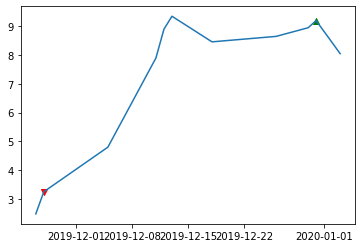

REQ: MSG_CODE=200&START_DATE=20191005&END_DATE=20200103&root=BMY&exp=20200103&strike=56000&right=C&sec=OPTION&req=1&rth=True&IVL=0


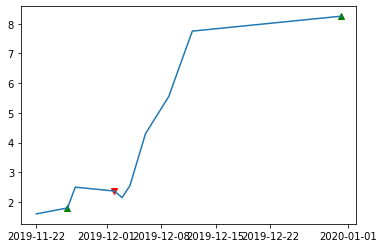

REQ: MSG_CODE=200&START_DATE=20191005&END_DATE=20200103&root=BMY&exp=20200103&strike=57000&right=C&sec=OPTION&req=1&rth=True&IVL=0


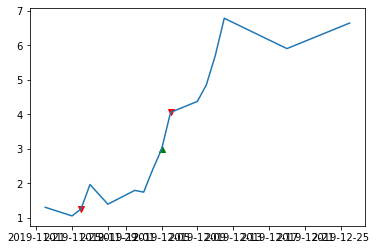

REQ: MSG_CODE=200&START_DATE=20191005&END_DATE=20200103&root=BMY&exp=20200103&strike=58000&right=C&sec=OPTION&req=1&rth=True&IVL=0


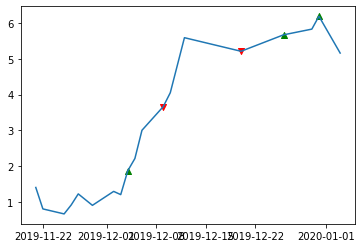

REQ: MSG_CODE=200&START_DATE=20191005&END_DATE=20200103&root=BMY&exp=20200103&strike=59000&right=C&sec=OPTION&req=1&rth=True&IVL=0


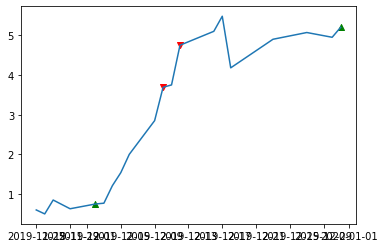

REQ: MSG_CODE=200&START_DATE=20191005&END_DATE=20200103&root=BMY&exp=20200103&strike=60000&right=C&sec=OPTION&req=1&rth=True&IVL=0


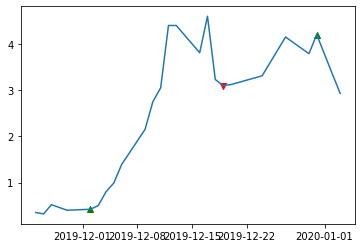

REQ: MSG_CODE=200&START_DATE=20191005&END_DATE=20200103&root=BMY&exp=20200103&strike=61000&right=C&sec=OPTION&req=1&rth=True&IVL=0


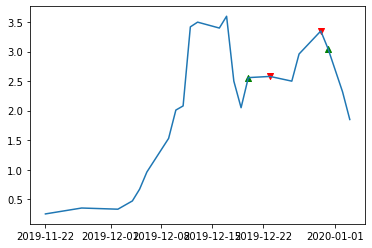

REQ: MSG_CODE=200&START_DATE=20191005&END_DATE=20200103&root=BMY&exp=20200103&strike=62000&right=C&sec=OPTION&req=1&rth=True&IVL=0


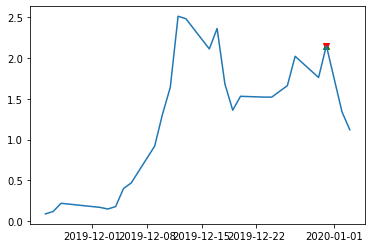

REQ: MSG_CODE=200&START_DATE=20191005&END_DATE=20200103&root=BMY&exp=20200103&strike=63000&right=C&sec=OPTION&req=1&rth=True&IVL=0


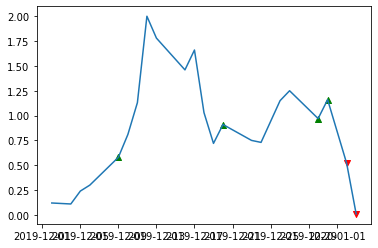

REQ: MSG_CODE=200&START_DATE=20191005&END_DATE=20200103&root=BMY&exp=20200103&strike=64000&right=C&sec=OPTION&req=1&rth=True&IVL=0


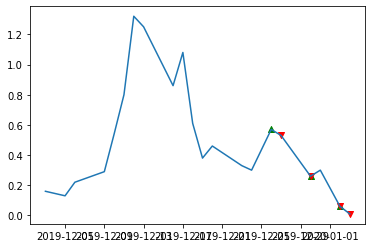

REQ: MSG_CODE=200&START_DATE=20191005&END_DATE=20200103&root=BMY&exp=20200103&strike=65000&right=C&sec=OPTION&req=1&rth=True&IVL=0


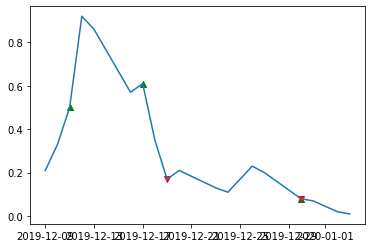

REQ: MSG_CODE=200&START_DATE=20191005&END_DATE=20200103&root=BMY&exp=20200103&strike=66000&right=C&sec=OPTION&req=1&rth=True&IVL=0


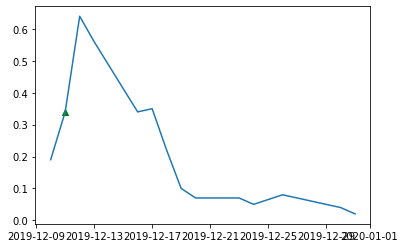

REQ: MSG_CODE=200&START_DATE=20191005&END_DATE=20200103&root=BMY&exp=20200103&strike=68000&right=C&sec=OPTION&req=1&rth=True&IVL=0


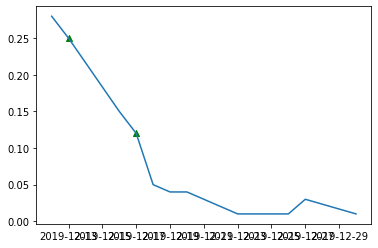

REQ: MSG_CODE=108
Shutting down...


In [48]:
client = ThetaClient(username="accounts@neuralnine.com",
                     passwd=open("pwfile.txt", "r").read())

exp_date = dt.date(2020, 1, 3)
ticker = "BMY"

with client.connect():
    for strike in strikes:
        data = client.get_hist_option(
                req=OptionReqType.EOD,
                root=ticker,
                exp=exp_date,
                strike=strike,
                right=OptionRight.CALL,
                date_range=DateRange(exp_date - dt.timedelta(90), exp_date)
            )
        
        data.columns = ["Open", "High", "Low", "Close", "Volume", "Count", "Date"]
        data.set_index("Date", inplace=True)
        
        plt.plot(data.index, data.Close)
        buy_data = df[df.transaction_type == "buy"]
        buy_data = buy_data[buy_data.strike == strike]
        filtered_data = data[data.index.isin(buy_data.index)]
        plt.scatter(filtered_data.index, filtered_data.Close, marker="^", color="green")
        
        sell_data = df[df.transaction_type == "sell"]
        sell_data = sell_data[sell_data.strike == strike]
        filtered_data = data[data.index.isin(sell_data.index)]
        plt.scatter(filtered_data.index, filtered_data.Close, marker="v", color="red")
        plt.show()